<h1 style="font-size:3rem;color:orange;">Directing User Subscriptions📱</h1>

<h2 style="font-size:2rem;color:orange;">Data Pre-processing and Model Building</h2>

### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import mlflow
import numpy as np
import pandas as pd
import os

### Import Data

In [2]:
app_user_data_df = pd.read_csv("../data/processed/new_app-user-data.csv")

### Data Peek 👀

In [3]:
app_user_data_df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,OtherScreens,CreditCardScreens,CreditMonitoringScreens,LoanScreens,SavingsScreens
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,1,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,1,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,1,0
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,1,0


In [4]:
app_user_data_df.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,OtherScreens,CreditCardScreens,CreditMonitoringScreens,LoanScreens,SavingsScreens
count,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,...,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000
mean,186897.636987,3.028730,12.559445,31.732425,20.824914,0.107756,0.172037,0.506520,0.165055,0.516973,...,0.014184,0.013342,0.013021,0.008165,0.007403,6.198620,0.173943,0.924805,0.787015,0.353342
std,107772.516054,2.032019,7.440927,10.806681,14.778043,0.310075,0.377416,0.499962,0.371234,0.499717,...,0.118251,0.114734,0.113364,0.089994,0.085723,3.655998,0.607022,1.215996,0.677037,1.378283
min,13.000000,0.000000,0.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,187183.500000,3.000000,14.000000,29.000000,18.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000
75%,279996.000000,5.000000,19.000000,37.000000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,3.000000,5.000000,3.000000,10.000000


Here we generate an interactive [YData Profiling](https://docs.profiling.ydata.ai/4.6/) report of our processed data which we save to a HTML file 

In [5]:
%%capture
from ydata_profiling import ProfileReport

# The local directory to save the report
data_dir = '../data/processed'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Generate the report & save to a file
data_profile = ProfileReport(app_user_data_df, title="Profiling Report of new_app-user-data.csv")
data_profile.to_file(f'../data/processed/ProfileReport_new_app-user-data.html')

- To view in the notebook, create a new cell below with ```data_profile.to_notebook_iframe()```

- View the report in the web browser [here](https://ml-fintech-case-studies.netlify.app/profile_reports/new_app-user-data.html#overview) 👁️‍🗨️

  <img src="../../images/app_users_processed_profile-report.png" width="585" alt="ProfileReport"/>

In [6]:
# Restore matplotlib to inline mode after viewing for plots
%matplotlib inline

# Data Pre-processing <img src="../../images/processing.gif" width="40" alt="Processing">

### Remove the label from the features

In [7]:
label = app_user_data_df['enrolled']
app_user_data_df = app_user_data_df.drop(columns = 'enrolled')

### Transformations

In [8]:
# Convert data to floats
app_user_data_df = app_user_data_df.astype(float)

In [9]:
# Take the log of 'numscreens' to address skew for linear models
app_user_data_df['log_numscreens'] = np.log(app_user_data_df['numscreens'])

# Drop the previous values 
app_user_data_df.drop('numscreens', axis=1, inplace=True)

### Feature Selection

The following function leverages a model's feature importance scores and [SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html) to calculate threshold scores for feature selection. We persist [results](../experiments/feature_thresholds/xgb_feat_threshold_scores.csv) to avoid duplicate runs.

In [10]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def get_threshold_scores(X_train, y_train, X_test, y_test, model, file_name, run_function):
    """
    Generates scores for feature importance thresholds to be used in feature selection.
    Accepts the training & test sets, the trained model, a file_name, & a boolean to execute.
    Writes a CSV file with the threshold, number of remaining features, & model evaluation metrics.
    """
    if run_function == False: return
    results = []
    # Fit model using each importance as a threshold
    thresholds = sort(model.feature_importances_)
    for thresh in thresholds:
        # Select features using threshold
        selection = SelectFromModel(model, threshold=thresh, prefit=True)
        # Apply selection to datasets
        select_X_train = selection.transform(X_train.values)
        select_X_test = selection.transform(X_test.values)
        num_features = select_X_train.shape[1]
        # Define the selection_model to use
        selection_model = XGBClassifier(n_estimators=100, objective='binary:logistic', random_state=42)
        # Train model
        selection_model.fit(select_X_train, y_train)
        # Evaluate model
        y_predict = selection_model.predict(select_X_test)
        accuracy = accuracy_score(y_test, y_predict)
        precision = precision_score(y_test, y_predict)
        recall = recall_score(y_test, y_predict)
        f1 = f1_score(y_test, y_predict)
        # Results
        results.append([thresh, num_features, accuracy, precision, recall, f1])
        
    # Create a DataFrame from the results list
    column_names = ["Threshold", "Num_Features", "Accuracy", "Precision", "Recall", "F1_Score"]
    threshold_results_df = pd.DataFrame(results, columns=column_names)
    # Save the DataFrame to a CSV file
    threshold_results_df.to_csv(file_name, index=False)  

### Split the dataset into training and test sets

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into an 80/20 train/test ratio
X_train, X_test, y_train, y_test = train_test_split(app_user_data_df, label,
                                                    test_size=0.2,
                                                    stratify=label, 
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)

(39875, 48)
(9969, 48)


### Filter model data

In [12]:
# Purge user identification, persist to associate the prediction to the user it came from 
train_identifier = X_train['user']
X_train = X_train.drop(columns = ['user'])

test_identifier = X_test['user']
X_test = X_test.drop(columns = ['user'])

### Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

def standard_scale(your_df, columns_to_exclude):
    """
    Performs standard scaling on numercial columns within a DataFrame.
    Accepts the DataFrame and an array of column names to exclude.
    Returns the modified DataFrame.
    """
    # Identify columns to be excluded from scaling
    excluded_columns = [col for col in your_df.columns if any(substring in col for substring in columns_to_exclude)]
    # Columns to be standardized
    columns_to_scale = [col for col in your_df.columns if col not in excluded_columns]
    # Instantiate the scaler
    standard_scaler_X = StandardScaler()
    # Scale the columns
    scaled_features = standard_scaler_X.fit_transform(your_df[columns_to_scale])
    # Convert scaled features into DataFrame
    scaled_df = pd.DataFrame(scaled_features, columns=columns_to_scale, index=your_df.index)
    # Concatenate the scaled features with the excluded columns to get the final dataframe
    your_df = pd.concat([scaled_df, your_df[excluded_columns]], axis=1)

    return your_df

In [14]:
binary_columns_to_exclude = [col for col in app_user_data_df.columns if set(app_user_data_df[col]) == {0, 1}]

X_train = standard_scale(X_train, binary_columns_to_exclude)
X_test = standard_scale(X_test, binary_columns_to_exclude)

# Model Building 🤖

### Training Data

In [15]:
# Split the training set into a 80/20 training/validation set
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, 
                                                                test_size=0.2, 
                                                                stratify=y_train, 
                                                                random_state=42)
print(X_train.shape)
print(X_validation.shape)

(31900, 47)
(7975, 47)


### Training Data Combined

For cross-validation and final model training

In [16]:
# Concatenate the training and validation feature datasets vertically
X_train_and_validation = pd.concat([X_train, X_validation], axis=0).reset_index(drop=True)

# Concatenate the training and validation label datasets vertically
y_train_and_validation = pd.concat([y_train, y_validation], axis=0).reset_index(drop=True)

### Metrics Function

In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

def evaluate_scores_and_concat(prob_posclass, y_test, y_predict, model_name, results_dataframe): 
    """
    Evaluates model scores and concatenates results to a DataFrame.
    """
    # Get scores
    accuracy = accuracy_score(y_test, y_predict)   # CorrectPredicts/TotalPredicts  
    precision = precision_score(y_test, y_predict) # TP/(TP+FP)
    recall = recall_score(y_test, y_predict)       # TP/(TP+FN)
    f1 = f1_score(y_test, y_predict)               # 2*(precision*recall)/(precision+recall)
    roc_auc = roc_auc_score(y_test, prob_posclass)
    # Transfer scores to a DataFrame
    new_results = pd.DataFrame([[model_name, accuracy, precision, recall, f1, roc_auc]],
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC'])
    # Concatenate results to the results_dataframe vertically
    results_dataframe = pd.concat([results_dataframe, new_results], axis=0).reset_index(drop=True)
    
    return results_dataframe

## Logistic Regression 📈

### Training

In [18]:
from sklearn.linear_model import LogisticRegression

# Penalty 'l1' Lasso regularization
lr_model = LogisticRegression(penalty='l1', solver='saga', random_state=42)

lr_model.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=42, solver='saga')

In [19]:
# Initialize a results DataFrame
df_results = pd.DataFrame()

### Evaluation

In [20]:
from sklearn.model_selection import cross_val_score

# Make predictions from the validation set
y_predict = lr_model.predict(X_validation)

# Predict the probabilities of the positive class
prob_posclass = lr_model.predict_proba(X_validation)[:, 1]

# Get model scores
df_results = evaluate_scores_and_concat(prob_posclass, y_validation, y_predict, 'LogisticRegression (Lasso)', df_results)

# Perform k-fold cross-validation, here with 10 folds
accuracies = cross_val_score(estimator=lr_model, X=X_train_and_validation, y=y_train_and_validation, cv=10)

print("Cross Validated Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Confidence Interval: +- {:.2f}%\n".format((accuracies.std()*2)*100))
df_results

Cross Validated Accuracy: 76.46%
Confidence Interval: +- 1.32%



,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,LogisticRegression (Lasso),0.760502,0.764209,0.762317,0.763262,0.834655


## Random Forest Classifier 🌳

### Training

In [21]:
from sklearn.ensemble import RandomForestClassifier

# 100 Trees
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

### Evaluation

In [22]:
# Make predictions from the validation set
y_predict = rf_model.predict(X_validation)

# Predict the probabilities of the positive class
prob_posclass = rf_model.predict_proba(X_validation)[:, 1]

# Get model scores
df_results = evaluate_scores_and_concat(prob_posclass, y_validation, y_predict, 'RandomForestClassifier (n=100)', df_results)

# Perform k-fold cross-validation, here with 10 folds
accuracies = cross_val_score(estimator=rf_model, X=X_train_and_validation, y=y_train_and_validation, cv=10)

print("Cross Validated Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Confidence Interval: +- {:.2f}%\n".format((accuracies.std()*2)*100))
df_results

Cross Validated Accuracy: 77.73%
Confidence Interval: +- 1.41%



,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,LogisticRegression (Lasso),0.760502,0.764209,0.762317,0.763262,0.834655
1,RandomForestClassifier (n=100),0.777053,0.787879,0.766031,0.776801,0.854993


## XGBoost Classifier 🚀


### Training

In [23]:
from xgboost import XGBClassifier

# 100 Stages
xgb_model = XGBClassifier(n_estimators=100, objective='binary:logistic', random_state=42)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

### Evaluation

In [24]:
# Make predictions from the validation set
y_predict = xgb_model.predict(X_validation)

# Predict the probabilities of the positive class
prob_posclass = xgb_model.predict_proba(X_validation)[:, 1]

# Get model scores
df_results = evaluate_scores_and_concat(prob_posclass, y_validation, y_predict, 'XGBClassifier (n=100)', df_results)

# Perform k-fold cross-validation, here with 10 folds
accuracies = cross_val_score(estimator=xgb_model, X=X_train_and_validation, y=y_train_and_validation, cv=10)

print("Cross Validated Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Confidence Interval: +- {:.2f}%\n".format((accuracies.std()*2)*100))
df_results

Cross Validated Accuracy: 77.79%
Confidence Interval: +- 1.30%



,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,LogisticRegression (Lasso),0.760502,0.764209,0.762317,0.763262,0.834655
1,RandomForestClassifier (n=100),0.777053,0.787879,0.766031,0.776801,0.854993
2,XGBClassifier (n=100),0.770909,0.784905,0.754395,0.769347,0.856257


## Save Data 💾

In [25]:
# Create a directory to save results
directory = "../experiments"
if not os.path.exists(directory): os.makedirs(directory)

df_results.to_csv("../experiments/baseline_metrics_001.csv", index=False)

## Baseline Model Evaluation <img src="https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExNDM1bWRnOW05MW9nNW1kNXJqbDNlMnRpMjFwZ2hpMHJuaWZ2Nms0eSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9cw/ZOKhyP4ai1guMHhwFB/giphy.gif" width="44" alt="Stat Bars">

Here we continue with a further evaluation of the [XGBClassifier](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier) algorithm as a baseline model

In [26]:
# Define model
model = xgb_model

### Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def sklearn_confusion_matrix(y_test, y_predict):
    """
    Generates a scikit-learn confusion matrix. 
    Accepts the test labels and the predicted labels from the model.
    Displays the plot.
    """
    # Create a confusion matrix with the labels and our model's predictions
    conf_matrix = confusion_matrix(y_test, y_predict)
    # Create the plot
    fig, ax = plt.subplots(figsize=(8,6), dpi=100)
    display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
    ax.set(title='Confusion Matrix for Predicting Loan E-Signature Model')
    display.plot(ax=ax, cmap='Blues', values_format='d')
    plt.show()

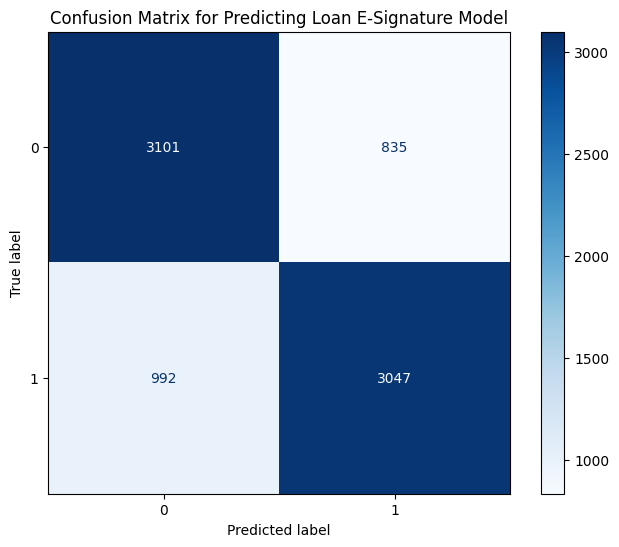

,Model,Accuracy,Precision,Recall,F1
0,XGBClassifier,0.770909,0.784905,0.754395,0.769347


In [28]:
# Plot confusion matrix
sklearn_confusion_matrix(y_validation, y_predict)

# Make predictions and display scores
y_predict = model.predict(X_validation)
prob_posclass = model.predict_proba(X_validation)[:, 1]
baseline_results_df = pd.DataFrame()
baseline_results_df = evaluate_scores_and_concat(prob_posclass, y_validation, y_predict, f'{type(model).__name__}', baseline_results_df)
conf_matrix_df = baseline_results_df.copy().drop(columns='ROC AUC')
conf_matrix_df

### Receiver Operating Characteristic (ROC) Curve

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn.objects as so

def plot_roc_curve(X_test, y_test, model):
   """
   Function for plotting the ROC Curve.
   Accepts the test features, test labels, and the trained model.
   Displays the plot and returns the AUC score. 
   """
   # Generate data for a 45 degree line
   noskill_probabilities = [0 for number in range(len(y_test))]
   # Predict the probabilities of the positive class
   probabilities_posclass = model.predict_proba(X_test)[:, 1]
   # Calculate data for horizontal line
   falsepositive_rate_noskill, truepositive_rate_noskill, _ = roc_curve(y_test, noskill_probabilities)
   # Calculate data for ROC curve
   falsepositive_rate, truepositive_rate, _ = roc_curve(y_test, probabilities_posclass)
   # Calculate AUC
   roc_auc = roc_auc_score(y_test, probabilities_posclass)
   # Display AUC
   print("AUC (Area Under the ROC Curve): {:.2f}".format(roc_auc))
   # Plot with Seaborn Objects
   plt = (so.Plot()
      .add(so.Line(color='red'), x =falsepositive_rate, y=truepositive_rate)
      .add(so.Line(color='blue', linestyle='dashed'), x=falsepositive_rate_noskill, y=truepositive_rate_noskill)
      .layout(size = (8,5))
      )
   plt.show()
   
   return roc_auc

AUC (Area Under the ROC Curve): 0.86


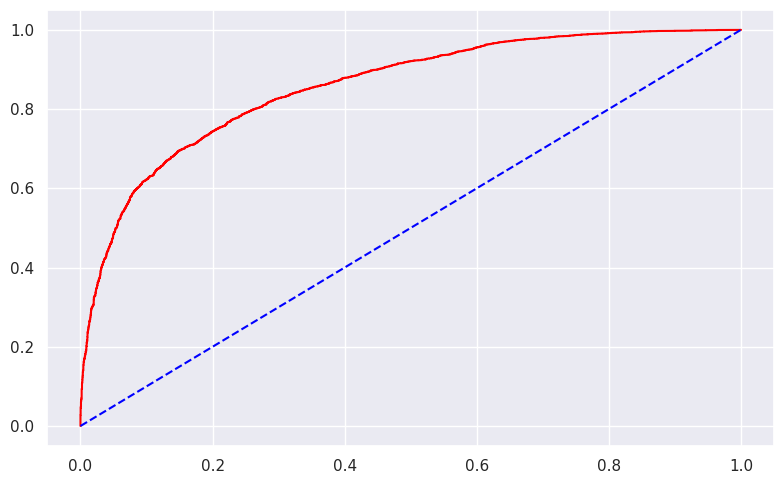

In [30]:
roc_auc = plot_roc_curve(X_validation, y_validation, model)

We note the model's discriminatory power is very good

### Feature Importances

In [31]:
def plot_feature_importance(X_train, model):
    """
    Plots feature importances from a model.
    Accepts the training features DataFrame and the trained model.
    Displays the plot and returns a DataFrame of features and their importance scores.
    """
    # Extract feature names from the DataFrame
    features = X_train.columns.tolist()
    # Create a DataFrame with feature names and their importance
    feature_df = pd.DataFrame({
      'Feature': features,
      'Importance': model.feature_importances_
      })
    # Sort the DataFrame by importance in descending order
    feature_df = feature_df.sort_values(by='Importance', ascending=False)
    # Adjust figure size as needed
    plt.figure(figsize=(10, 20)) 
    plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances')
    plt.gca().invert_yaxis() # Place highest importance at top
    plt.show()

    return feature_df

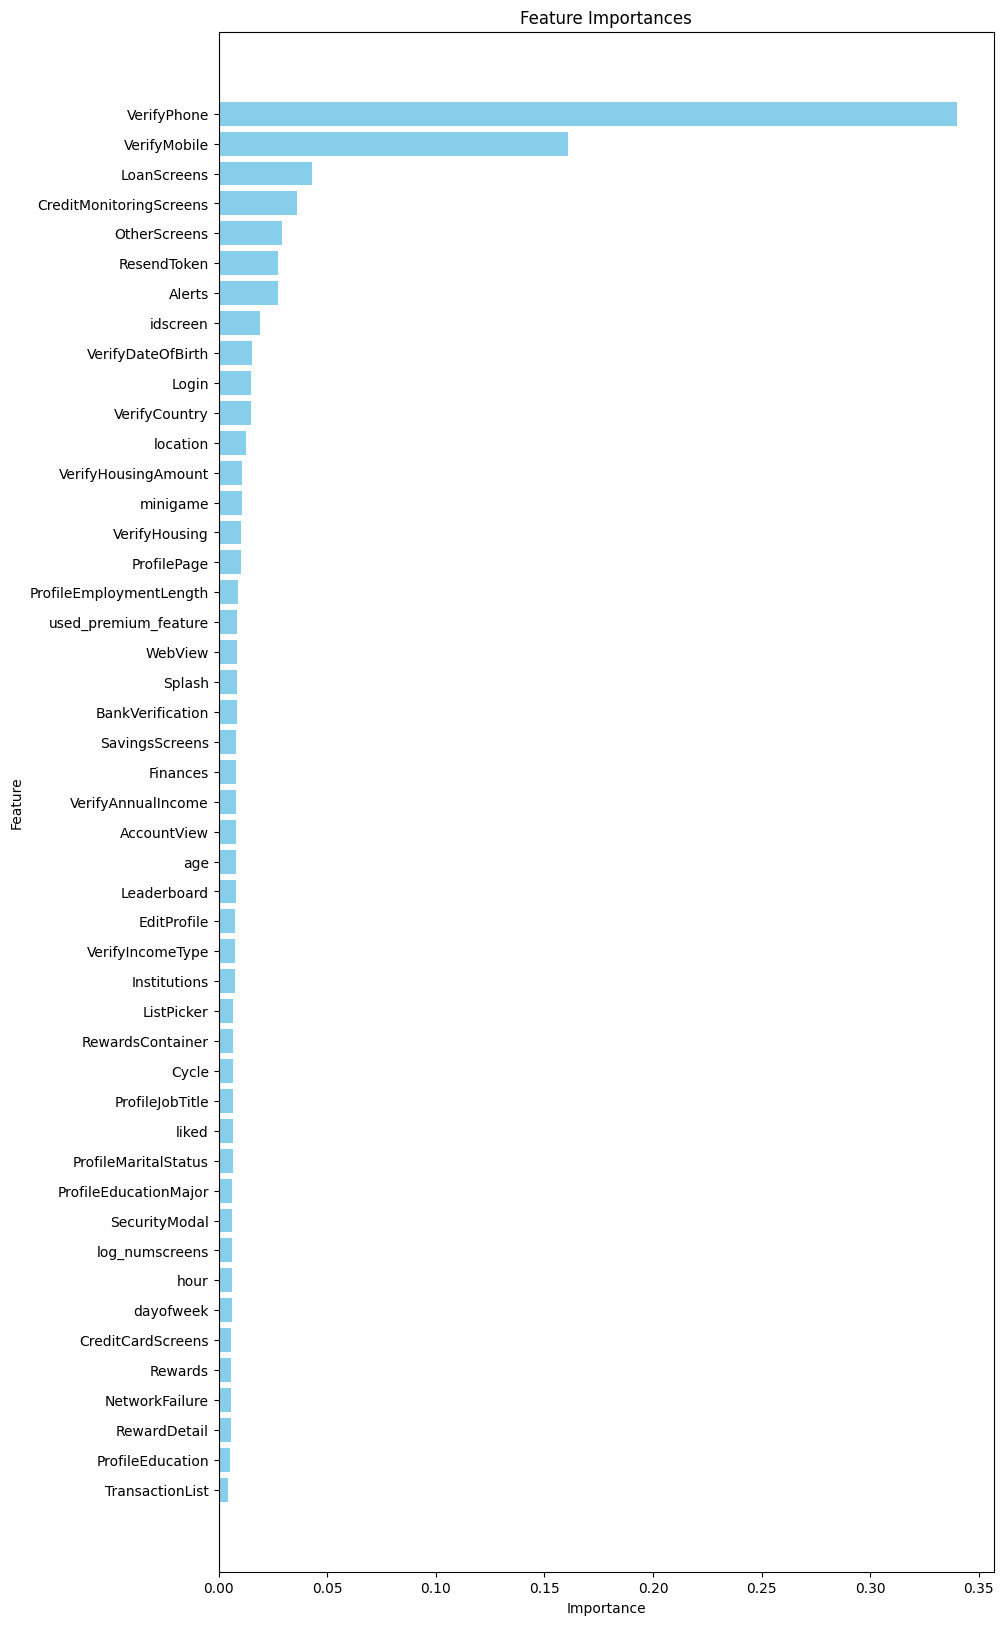

,Feature,Importance
14,VerifyPhone,0.339775
27,VerifyMobile,0.160815
6,LoanScreens,0.042962
5,CreditMonitoringScreens,0.035935
3,OtherScreens,0.029013
43,ResendToken,0.027558
25,Alerts,0.027280
20,idscreen,0.018973
16,VerifyDateOfBirth,0.015322
39,Login,0.014994


In [32]:
feature_df = plot_feature_importance(X_train, model)
# Adjust as needed
feature_df.head(10)

### Feature Selection

- Generate Threshold Scores

In [33]:
file_name = "../experiments/feature_thresholds/xgb_feat_threshold_scores.csv"

get_threshold_scores(X_train, y_train,X_validation, y_validation, model, file_name, False)

- Inspect Results

In [34]:
threshold_results_df = pd.read_csv(file_name)

# Set the display format for float values to 10 decimal places
pd.set_option('display.float_format', '{:.10f}'.format)

# Adjust for full list
threshold_results_df.head()

,Threshold,Num_Features,Accuracy,Precision,Recall,F1_Score
0,0.0045522675,47,0.7709090909,0.7849046883,0.7543946521,0.7693473046
1,0.0054445890,46,0.7711598746,0.7870850622,0.7514236197,0.7688410386
2,0.0055741705,45,0.7732915361,0.7860989997,0.7588512008,0.7722348199
3,0.0057759834,44,0.7732915361,0.7863928113,0.7583560287,0.7721199899
4,0.0058625606,43,0.7677742947,0.7804565273,0.7534043080,0.7666918619


In [35]:
# Reset display option to default value
pd.reset_option('display.float_format')

- Select Features 

In [36]:
threshold = 0.0078923660

# Define features under the threshold to remove
features_to_remove_df = feature_df[feature_df['Importance'] < threshold]
columns_to_drop = features_to_remove_df['Feature'].values.tolist()

print(columns_to_drop)

['age', 'Leaderboard', 'EditProfile', 'VerifyIncomeType', 'Institutions', 'ListPicker', 'RewardsContainer', 'Cycle', 'ProfileJobTitle', 'liked', 'ProfileMaritalStatus', 'ProfileEducationMajor', 'SecurityModal', 'log_numscreens', 'hour', 'dayofweek', 'CreditCardScreens', 'Rewards', 'NetworkFailure', 'RewardDetail', 'ProfileEducation', 'TransactionList']


In [37]:
# Drop the features from the datasets
X_train.drop(columns=columns_to_drop, axis=1, inplace=True)
X_validation.drop(columns=columns_to_drop, axis=1, inplace=True)
X_train_and_validation.drop(columns=columns_to_drop, axis=1, inplace=True)
X_test.drop(columns=columns_to_drop, axis=1, inplace=True)

print("Number of Features: ", X_train.shape[1])

Number of Features:  25


- Retraining & Evaluation

In [38]:
model.fit(X_train, y_train)

# Make predictions from the validation set
y_predict = model.predict(X_validation)
# Predict the probabilities of the positive class
prob_posclass = xgb_model.predict_proba(X_validation)[:, 1]
# Get model scores
df_results = evaluate_scores_and_concat(prob_posclass, y_validation, y_predict, f"XGBClassifier (n=100, feat_thresh={threshold})", df_results)
# Perform k-fold cross-validation, here with 10 folds
accuracies = cross_val_score(estimator=model, X=X_train_and_validation, y=y_train_and_validation, cv=10)

print("Cross Validated Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Confidence Interval: +- {:.2f}%\n".format((accuracies.std()*2)*100))
df_results

Cross Validated Accuracy: 78.10%
Confidence Interval: +- 1.36%



,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,LogisticRegression (Lasso),0.760502,0.764209,0.762317,0.763262,0.834655
1,RandomForestClassifier (n=100),0.777053,0.787879,0.766031,0.776801,0.854993
2,XGBClassifier (n=100),0.770909,0.784905,0.754395,0.769347,0.856257
3,"XGBClassifier (n=100, feat_thresh=0.007892366)",0.780564,0.803340,0.750433,0.775986,0.859407


We observe an improvement in our scores as a result of feature selection and continue with hyperparameter optimization

## Model Tuning <img src="../../images/tuning.gif" width="50" alt="Tuning"/>

Here we utilize Hyperopt for model tuning to take advantage of Bayesian Optimization 

- We begin by initializing MLflow to document our [experiment](../experiments/README.md) 🧪

In [39]:
# Define a location to save experiments
experiment_dir = '../experiments/mlflow_xgb'
if not os.path.exists(experiment_dir):
    os.makedirs(experiment_dir)

In [40]:
import random

# 5 digit random number for the experiment
random_number = random.randint(10_000, 99_999)
# Set the tracking URI to the directory above
mlflow.set_tracking_uri(f'file://{os.path.abspath(experiment_dir)}')
# Create a new experiment
EXPERIMENT_ID = mlflow.create_experiment(f'hyperopt_tuning_{random_number}')
# Fetch experiment details
experiment = mlflow.get_experiment(EXPERIMENT_ID)

print(f"Name: {experiment.name}")
print(f"Experiment_id: {experiment.experiment_id}")
print(f"Artifact Location: file://{experiment_dir}/{experiment.experiment_id}")
print(f"Tags: {experiment.tags}")
print(f"Lifecycle_stage: {experiment.lifecycle_stage}")
print(f"Creation timestamp: {experiment.creation_time}")

Name: hyperopt_tuning_70519
Experiment_id: 157068820408060447
Artifact Location: file://../experiments/mlflow_xgb/157068820408060447
Tags: {}
Lifecycle_stage: active
Creation timestamp: 1699428413460


- Define the objective function

In [41]:
from hyperopt import STATUS_OK
from mlflow.models.signature import infer_signature
from xgboost import XGBClassifier

def objective_function(space):
    """
    The objective function for Hyperopt. 
    Accepts the hyperparameter search space & returns a loss score to minimize. 
    Logs metadata & the model from best trials.
    """
    global best_objective_value_so_far
    
    # Define & train model
    model = XGBClassifier(**space, random_state=42)
    model = model.fit(X_train, y_train)
    # Predict values & positive class probabilities for the validation set
    y_val_predict = model.predict(X_validation)
    probabilities_posclass = model.predict_proba(X_validation)[:, 1]
    # Evaluation metrics
    val_accuracy = accuracy_score(y_validation, y_val_predict)
    val_precision = precision_score(y_validation, y_val_predict, zero_division=0)
    val_recall = recall_score(y_validation, y_val_predict)
    val_f1 = f1_score(y_validation, y_val_predict)
    val_roc_auc = roc_auc_score(y_validation, probabilities_posclass)
    
    validation_metrics = {
      "accuracy": val_accuracy, 
      "precision": val_precision, 
      "recall": val_recall, 
      "F1": val_f1, 
      "roc_auc": val_roc_auc
    }
    
    with mlflow.start_run(experiment_id=experiment.experiment_id):
        mlflow.log_params(space)
        mlflow.log_params({"validation_feature_importances": model.feature_importances_})
        for name, metric in validation_metrics.items():
            mlflow.log_metric(f"validation_{name}", metric)
        signature = infer_signature(X_train, y_val_predict)
        mlflow.xgboost.log_model(xgb_model=model, 
                                 artifact_path="model", 
                                 signature=signature, 
                                 input_example=X_train.iloc[[0]], 
                                 pip_requirements="./requirements.txt")
        mlflow.set_tag("estimator_name", model.__class__.__name__)
        mlflow.set_tag("estimator_class", model.__class__)
        mlflow.end_run()
    
    # Here we aim to maximize the roc_auc, thus return it as a negative value
    return {'loss': -val_roc_auc, 'status': STATUS_OK}

- Define the search space

In [42]:
from hyperopt import hp
from hyperopt.pyll.base import scope

search_space = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'n_estimators': scope.int(hp.quniform('n_estimators', 100, 400, 10)),
    'max_depth': scope.int(hp.quniform('max_depth', 4, 15, 1)),
    'subsample': hp.uniform('subsample', .5, 1.0),
    'learning_rate': hp.loguniform('learning_rate', -7, 0),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 7),
    'reg_alpha': hp.loguniform('reg_alpha', -10, 10),
    'reg_lambda': hp.loguniform('reg_lambda', -10, 10),
    'gamma': hp.loguniform('gamma', -10, 10),
    'use_label_encoder': False,
    'verbosity': 0,
    }

- Run Hyperopt. _For optimal (or fastest) results, see [suggested formulas](https://www.databricks.com/blog/2021/04/15/how-not-to-tune-your-model-with-hyperopt.html). This may take some time, go have some tea_ 

In [43]:
from hyperopt import fmin, tpe, Trials

# Demo number of trials, adjust for utilization
num_evals = 7
trials = Trials()

best_hyperparam = fmin(fn=objective_function, 
                       space=search_space, 
                       algo=tpe.suggest, # Bayesian search w/ Tree Parzen Estimator (TPE)
                       max_evals=num_evals, 
                       trials=trials, 
                       rstate=np.random.default_rng(42)
                       ) 

print(best_hyperparam)

100%|██████████| 7/7 [00:55<00:00,  8.00s/trial, best loss: -0.8588184975452751]
{'gamma': 1.6717454718446907, 'learning_rate': 0.4667529468841399, 'max_depth': 13.0, 'min_child_weight': 35.93906811331547, 'n_estimators': 150.0, 'reg_alpha': 10.519356386632165, 'reg_lambda': 0.00019809190050441863, 'subsample': 0.5734813936425138}


#### MLflow Functions

In [44]:
def get_best_scoring_model(metric_name, ascending_boolean, experiment_dir, experiment_ID):
    """
    Returns a model with the best scoring metric from MLflow.
    Accepts the metric name, an ascending order boolean (False=Higher Scores, True=Lower Scores),
    path to the directory hosting the experiment, and experiment_id.
    Returns the model with the best metric from MLflow. 
    """
    # Provide the path to directory hosting the experiment (provided above)
    mlflow.set_tracking_uri(f'file://{os.path.abspath(experiment_dir)}')
    # Provide the experiment_id (active experiment 'experiment.experiment_id' or define)
    experiment_id = experiment_ID
    # Get the runs from the experiment
    runs = mlflow.search_runs(experiment_ids=[experiment_id], filter_string='', max_results=1000)
    # Filter the runs for best desired metric
    best_run = runs.sort_values(f"metrics.{metric_name}", ascending=ascending_boolean).iloc[0]
    # Provide the URI
    best_model_uri = best_run["artifact_uri"] + "/model"
    # Modify this line to your flavor of model: sklearn, spark, xgboost, pytorch, tensorflow, etc.
    model = mlflow.xgboost.load_model(best_model_uri)
    
    print("Best Scoring Run ID:", best_run.run_id)
    print("Model Type:", type(model).__name__)
    print("Hyperparameters: ", model.get_params())
    
    return model

In [45]:
def get_model(experiment_dir,run_id):
    """
    Returns a model logged with MLflow.
    Accepts a path to the directory hosting the experiment and run_id.
    """
    # Path to the directory hosting the experiment 
    mlflow.set_tracking_uri(f'file://{os.path.abspath(experiment_dir)}')
    # Specify model URI
    model_uri = f"runs:/{run_id}/model" 
    # Modify this line to your flavor of model: sklearn, spark, xgboost, pytorch, tensorflow, etc.
    model = mlflow.xgboost.load_model(model_uri)
    
    return model

### K-Fold Cross Validation

Here we estimate how well the tuned model is likely to generalize to unseen data

In [46]:
# Active experiment: experiment.experiment_id
experiment_ID = "880003663376093159"

# Load the best scoring model from the experiment 
model = get_best_scoring_model("validation_roc_auc", False, experiment_dir, experiment_ID)

Best Scoring Run ID: 95578a56d15a4e539cbcd74cff84be56
Model Type: XGBClassifier
Hyperparameters:  {'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'auc', 'feature_types': None, 'gamma': 0.0022788464778158196, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.029003908033482288, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 7, 'max_leaves': None, 'min_child_weight': 0.8170911337892932, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 400, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': 42, 'reg_alpha': 0.00010215677382178698, 'reg_lambda': 5.890998154323654, 'sampling_method': None, 'scale_pos_weight': 

In [47]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation, here with 10 folds
accuracies = cross_val_score(estimator=model, X=X_train_and_validation, y=y_train_and_validation, cv=10)

print("Cross Validated Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Confidence Interval: +- {:.2f}%\n".format((accuracies.std()*2)*100))
print(accuracies)

Cross Validated Accuracy: 78.34%
Confidence Interval: +- 1.52%

[0.77382146 0.79714142 0.7893681  0.7830993  0.77081244 0.78254327
 0.78956609 0.78906446 0.77903185 0.78003511]


## Final Model Training 🦾

## Final Model Evaluation <img src="https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExNDM1bWRnOW05MW9nNW1kNXJqbDNlMnRpMjFwZ2hpMHJuaWZ2Nms0eSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9cw/ZOKhyP4ai1guMHhwFB/giphy.gif" width="44" alt="Stat Bars">

## Save Model 💾

## Process Results 🔄

Here we format the final results from our model's predictions to the user this data came from. Though in the future we will not have 'enrolled' data for the deployed model's predictions, a similar process can be utilized. This enables the sales team to identify users the model has estimated unlikely to subscribe to paid subscriptions. 

In [ ]:
# Concatenate test labels to the user they came from
final_results = pd.concat([y_test, test_identifier], axis =1).dropna()
# Add predicted results from the model
final_results['predicted_results'] = y_predict
final_results = final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop=True)

# Adjust as needed
final_results.head(10)

### Save Data 💾

Persist final results and a list of users our model has estimated to be unlikely to enroll in the paid subscription

In [ ]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table
from datetime import datetime
import csv

# Create a directory to save results if it doesn't exist
directory = "../data/results"
if not os.path.exists(directory):
    os.makedirs(directory)
    
# Get the current date and time, remove milliseconds
datetime = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Save final results to a .csv file 
final_results.to_csv(f"../data/results/final_results_{datetime}.csv")

# Filter the DataFrame for a list of users unlikely to subscribe
final_results = final_results[final_results.predicted_results == 0].copy()
unlikely_to_subscribe = final_results.copy().drop(columns = ['enrolled', 'predicted_results'])

# Save the list of users unlikely to subscribe to a .csv file
unlikely_to_subscribe.to_csv(f"../data/results/users_unlikely_to_subscribe_{datetime}.csv")

# Define paths to convert
csv_file = f"../data/results/users_unlikely_to_subscribe_{datetime}.csv"
pdf_file = f"../data/results/users_unlikely_to_subscribe_{datetime}.pdf"

# Convert the .csv file 
data = []
with open(csv_file, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        data.append(row)

# Create a PDF document
doc = SimpleDocTemplate(pdf_file, pagesize=letter)

# Create a table from the CSV data
table = Table(data)

# Add the table to the document
doc.build([table])